# Learn001
> Author : Benjamin142857
>
> Date : 2019-08-30
>
> [TOC]


In [194]:
import numpy as np
import scipy as sp
from scipy import io as spio
from scipy.integrate import quad, dblquad, odeint, nquad
from scipy.interpolate import interp1d, splev, splrep, PPoly
from scipy.misc import derivative
from scipy import optimize
import matplotlib.pyplot as plt



## 1

In [5]:
a = np.ones((3,3))
spio.savemat('f.mat',{'a':a})
data = spio.loadmat('f.mat',struct_as_record=True)
data['a']


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

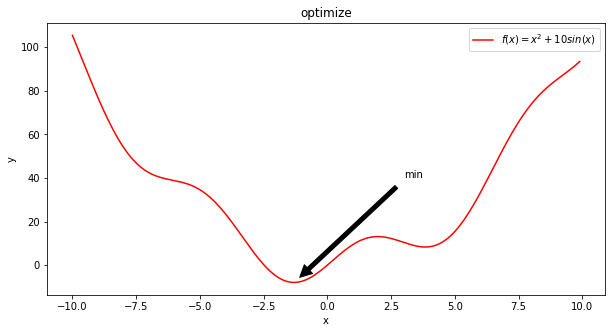

In [10]:


#定义目标函数
def f(x):
    return x**2+10*np.sin(x)

#绘制目标函数的图形
plt.figure(figsize=(10,5))
x = np.arange(-10,10,0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x,f(x),'r-',label='$f(x)=x^2+10sin(x)$')
#图像中的最低点函数值
a = f(-1.3)
plt.annotate('min',xy=(-1.3,a),xytext=(3,40),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()
plt.show()

In [27]:
def f(x):
    return x**3+10*np.sin(x)

optimize.fmin_bfgs(f,0)

Optimization terminated successfully.
         Current function value: -8602591215590292271923200.000000
         Iterations: 2
         Function evaluations: 48
         Gradient evaluations: 16


array([-2.04900536e+08])

In [33]:
from mayavi import mlab

[x, y] = np.mgrid[-5:5:0.1, -5:5:0.1]
f = lambda x, y: np.sin(x*y)
plot = mlab.surf(x, y, f)
ScManager = plot.module_manager.scalar_lut_manager
ScManager.show_legend = True
mlab.show()

In [197]:
area = dblquad(lambda x, y: np.sin(x*y), 0, 1, lambda y: 0, lambda y: 1-y)
area2 = nquad(lambda x, y: np.sin(x*y), [lambda y: [0, 1-y], lambda : [0, 1]])
print(area)
print(area2)

(0.04151810742320443, 8.167661755467589e-16)
(0.04151810742320443, 8.167661755467589e-16)


In [56]:
area2 = quad(lambda y: -(1/y)*np.cos(y-y**2)+1/y, 0, 1)
area2

(0.041518107423204414, 4.609435880010217e-16)

In [58]:
area2[0] - area[0]

-1.3877787807814457e-17

In [60]:
def sol(y,t,v0,w0):
    return (w0*y[1]+v0,-w0*y[0])
y = odeint(sol,(0,0),t,args = (10,10))

NameError: name 't' is not defined

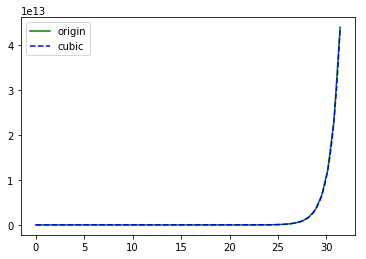

0.0
0.0025468733859730364
0.004620662328827185
0.006260730241892887
0.007505398883360215
0.00839191507845527
0.008956416378482324
0.009233895622777544
0.00925816436851723
0.009061815152219266
0.008676182545609645
0.008131302967335774
0.007455873210780339
0.006677207646969885
0.005821194060230628
0.0049122480729306695
0.003973266114220664
0.003025576886266368
0.002088891279977023
0.0011812506906694331
0.0003189736825919276
-0.00048339905048466747
-0.0012131614830055426
-0.001859500869906494
-0.002413558231367574
-0.002868490769885046
-0.003219536281378055
-0.003464079624057703
-0.0036017213107513157
-0.003634348292583578
-0.003566207003968369
-0.003403978741175706
-0.0031568574490310475
-0.0028366299926672056
-0.002457758993719139
-0.002037468312892976
-0.0015958312634669625
-0.0011558616429292456
-0.00074360767283288
-0.0003882489397390998
-0.00012219643314548279
1.8958844087535454e-05
2.0659134219336295e-05
-8.42036708261773e-05
-0.0002600277025024411
-0.00047499271517637
-0.000701180

227759.37787246704
158185.33382034302
-504369.1351661682
-1696365.0167236328
-3222435.6684150696
-4905102.64515686
-6588221.722679138
-8137664.463233948
-9442021.55543518
-10413328.623744965
-10987815.225364685
-11126677.77539444
-10816877.164749146
-10071961.859630585
-8932917.296474457
-7469042.4127388
-5778854.180187225
-3991021.0354118347
-2265326.1306610107
-793661.3577651978
198946.87182617188
453279.07635498047
-322808.7601547241
-2211208.8145217896
-4871995.071052551
-7953881.228134155
-11145596.20375061
-14177162.504348755
-16821215.433891296
-18894364.44771576
-20258597.997695923
-20822733.258163452
-20543912.166046143
-19429145.255500793
-17536904.813156128
-14978768.930244446
-11921118.07724762
-8586885.879234314
-5257365.82321167
-2274075.684486389
-40681.51615905762
975016.8957672119
239037.14776611328
-2688123.2054595947
-7373323.28616333
-13117297.331222534
-19295391.31668091
-25360402.934692383
-30845055.948486328
-35364553.59614563
-38619213.56767273
-40397187.1622314

In [84]:
x=np.linspace(0,10*np.pi,num=50)
F = lambda x: np.e**x + x
y=F(x)
f1=interp1d(x,y,kind='linear')#线性插值
f2=interp1d(x,y,kind='cubic')#三次样条插值
x_pred=np.linspace(0,10*np.pi,num=1000)
y1=f1(x_pred)
y2=f2(x_pred)
plt.plot(x, y, 'g', label='origin')
# plt.plot(x_pred,y1,'r',label='linear')
plt.plot(x_pred,y2,'b--',label='cubic')
plt.legend()
plt.show()

for x in x_pred:
    print(f2(x)-F(x))

In [109]:
f2._call(3)

TypeError: _call_spline() missing 1 required positional argument: 'x_new'

In [106]:
f2(13)

array(442277.2304083)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


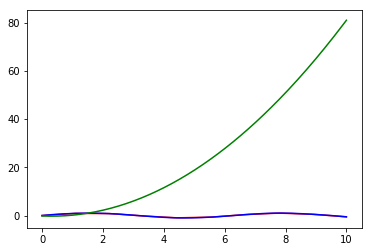

In [172]:
xxx = np.linspace(0, 10, 10)
print(x)
y = np.sin(x)
spl = splrep(xxx, y, k=2)
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(xxx, y, 'r')
plt.plot(x2, y2, 'b')
plt.plot(x2, f2(x2), 'g')
plt.show()

In [142]:
print(spl)
pp = PPoly.from_spline(spl)
pp.c.T

(array([ 0.        ,  0.        ,  0.        ,  1.66666667,  2.77777778,
        3.88888889,  5.        ,  6.11111111,  7.22222222,  8.33333333,
       10.        , 10.        , 10.        ]), array([-1.03446807e-17,  1.04288290e+00,  9.27327312e-01, -2.21975202e-01,
       -1.12001981e+00, -7.72442898e-01,  4.33865074e-01,  1.16246230e+00,
        4.19564769e-01, -5.44021111e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 2)


array([[-4.00397853e-01,  1.25145948e+00, -1.03446807e-17],
       [-4.00397853e-01,  1.25145948e+00, -1.03446807e-17],
       [-4.00397853e-01,  1.25145948e+00, -1.03446807e-17],
       [-4.28027506e-01, -8.32000259e-02,  9.73549549e-01],
       [ 1.01759453e-01, -1.03437226e+00,  3.52676055e-01],
       [ 5.04476713e-01, -8.08240144e-01, -6.70997504e-01],
       [ 3.47786081e-01,  3.12819217e-01, -9.46231352e-01],
       [-1.93472854e-01,  1.08567718e+00, -1.69288912e-01],
       [-5.35780674e-01,  6.55737500e-01,  7.98163685e-01],
       [-1.86425051e-01, -5.34886220e-01,  8.65303285e-01],
       [-1.86425051e-01, -1.15630306e+00, -5.44021111e-01],
       [-1.86425051e-01, -1.15630306e+00, -5.44021111e-01]])

In [177]:
def F(i):
    f = lambda x: pp.c.T[i][0]*(x-spl[0][i])**2 + pp.c.T[i][1]*(x-spl[0][i]) + pp.c.T[i][2]
    return f

f2 = F(2)
f3 = F(3)

In [190]:
print(f2(1.66666667), f3(1.66666667))
print(derivative(f2, 1.66666667, dx=1e-9), derivative(f3, 1.66666667, dx=1e-9))

0.9735495484122043 0.9735495484122039
-0.08320000244310677 -0.083200057954258


In [152]:
pp.c.T[3]

array([-0.42802751, -0.08320003,  0.97354955])

In [163]:
pp.c

array([[-4.00397853e-01, -4.00397853e-01, -4.00397853e-01,
        -4.28027506e-01,  1.01759453e-01,  5.04476713e-01,
         3.47786081e-01, -1.93472854e-01, -5.35780674e-01,
        -1.86425051e-01, -1.86425051e-01, -1.86425051e-01],
       [ 1.25145948e+00,  1.25145948e+00,  1.25145948e+00,
        -8.32000259e-02, -1.03437226e+00, -8.08240144e-01,
         3.12819217e-01,  1.08567718e+00,  6.55737500e-01,
        -5.34886220e-01, -1.15630306e+00, -1.15630306e+00],
       [-1.03446807e-17, -1.03446807e-17, -1.03446807e-17,
         9.73549549e-01,  3.52676055e-01, -6.70997504e-01,
        -9.46231352e-01, -1.69288912e-01,  7.98163685e-01,
         8.65303285e-01, -5.44021111e-01, -5.44021111e-01]])

In [189]:
def h(x):
    return np.e**x
derivative(h, 3, dx=1e-9)

20.08553856569506

In [204]:
nquad(lambda x, y, z: 1, [lambda y, z:[0, 2], lambda z:[0, 2], lambda :[0, 2]])

(8.0, 8.881784197001252e-14)

In [207]:
# 定义函数（按传入顺序默认先积x, 后积y）
f = lambda x, y: x*y

# 定义范围取值
x_bound = lambda y: [0, 1-2*y]		# x范围是以y为参数的函数,返回列表（表示取值范围）
y_bound = lambda : [0, 1/2]			# y范围是无参函数，返回列表（表示取值范围）

# 求积分值
I = nquad(f, [x_bound, y_bound])
I

(0.010416666666666668, 4.101620128472366e-16)

In [236]:
f = lambda y, x: np.e**x
t = np.arange(0,100,1)
q = odeint(f, 1, t)
len(q)

100

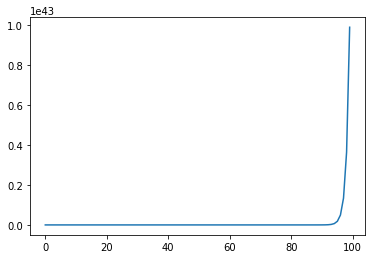

In [237]:
plt.plot(t, q)

In [238]:
q

array([[1.00000000e+00],
       [2.71828187e+00],
       [7.38905618e+00],
       [2.00855371e+01],
       [5.45981503e+01],
       [1.48413160e+02],
       [4.03428795e+02],
       [1.09663317e+03],
       [2.98095801e+03],
       [8.10308400e+03],
       [2.20264660e+04],
       [5.98741423e+04],
       [1.62754793e+05],
       [4.42413396e+05],
       [1.20260430e+06],
       [3.26901740e+06],
       [8.88611060e+06],
       [2.41549530e+07],
       [6.56599698e+07],
       [1.78482303e+08],
       [4.85165200e+08],
       [1.31881575e+09],
       [3.58491288e+09],
       [9.74480354e+09],
       [2.64891224e+10],
       [7.20049000e+10],
       [1.95729611e+11],
       [5.32048246e+11],
       [1.44625708e+12],
       [3.93133433e+12],
       [1.06864747e+13],
       [2.90488499e+13],
       [7.89629609e+13],
       [2.14643582e+14],
       [5.83461748e+14],
       [1.58601347e+15],
       [4.31123159e+15],
       [1.17191425e+16],
       [3.18559321e+16],
       [8.65934012e+16],


In [261]:
def fvdp2(t,y):
    '''
    要把y看出一个向量，y = [dy0,dy1,dy2,...]分别表示y的n阶导
    对于二阶微分方程，肯定是由0阶和1阶函数组合而成的，所以下面把y
    看成向量的话，y0表示最初始的函数，也就是我们要求解的函数，y1表示
    一阶导，对于高阶微分方程也可以以此类推
    '''
    y0, y1 = y   # y0是需要求解的函数，y1是一阶导
    # 注意返回的顺序是[一阶导， 二阶导]，这就形成了一阶微分方程组
    dydt = [2*t, y0-t**2] 
    return dydt


t2 = np.linspace(-10, 10, 1000)
y0 = [2.0, 0.0] # 初值条件
# 初值[2,0]表示y(0)=2,y'(0)=0
# 返回y，其中y[:,0]是y[0]的值，就是最终解，y[:,1]是y'(x)的值
ff = odeint(fvdp2, y0, t2, tfirst=True)


ffchk = t2**2 + 2


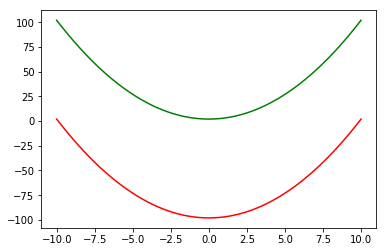

In [264]:
plt.plot(t2, ff[:, 0], 'r')
plt.plot(t2, ffchk, 'g')

In [260]:
ff[:, 0]

array([ 2.00000000e+00,  1.98038682e+00,  1.92164625e+00,  1.82391474e+00,
        1.68731282e+00,  1.51194508e+00,  1.29790028e+00,  1.04525134e+00,
        7.54055396e-01,  4.24353816e-01,  5.61722155e-02, -3.50479553e-01,
       -7.95607380e-01, -1.27923288e+00, -1.80139344e+00, -2.36214218e+00,
       -2.96154804e+00, -3.59969575e+00, -4.27668593e+00, -4.99263505e+00,
       -5.74767552e+00, -6.54195577e+00, -7.37564024e+00, -8.24890952e+00,
       -9.16196037e+00, -1.01150058e+01, -1.11082752e+01, -1.21420144e+01,
       -1.32164858e+01, -1.43319684e+01, -1.54887579e+01, -1.66871669e+01,
       -1.79275253e+01, -1.92101797e+01, -2.05354942e+01, -2.19038502e+01,
       -2.33156470e+01, -2.47713011e+01, -2.62712474e+01, -2.78159385e+01,
       -2.94058455e+01, -3.10414579e+01, -3.27232838e+01, -3.44518500e+01,
       -3.62277027e+01, -3.80514071e+01, -3.99235479e+01, -4.18447298e+01,
       -4.38155771e+01, -4.58367346e+01, -4.79088675e+01, -5.00326617e+01,
       -5.22088244e+01, -